In [1]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats

%matplotlib inline

# Insights
### 1. In the intervention mode, the average of max forward bend, tilt velocity, and twist velocity are gernerally lower than baseline mode
### 2. There is no moderate risk under the intervention mode but 173 records under the baseline mode. We can see from the result that the sensor has good influence for avoding moderate risk. No high risk in both group
### 3. After t-test, there is the significant difference between baseline safety score and intevention safety score, suggesting that the sensor intervention can improve the workplaze safety
### 4. After t-test result of each contribution factors to safety score, there is strong evidence that the sensor has the sigificant impact on lift rate

# Recommendation
### 1. The twist velocity is the most important feature to impact safety score, our clients should pay attention to workers twist motion
### 2. Clients should continue choose to use the sensor since it has great impact on reducing the injuries and potential injuries

In [2]:
data=pd.read_csv('strongarm_data.csv')

In [3]:
data.head()

,Warehouse,Job Function,ID,Haptic Group,Baseline File Count,Baseline Average Lift Rate,Baseline Average Max Forward Bend,Baseline Average Max Tilt Velocity,Baseline Average Twist Velocity,Baseline Average Safety Score,Intervention File Count,Intervention Average Lift Rate,Intervention Average Max Forward Bend,Intervention Average Max Tilt Velocity,Intervention Average Twist Velocity,Intervention Average Safety Score
0,Albany,Package Handler,A8R965235592,3 bends in 8 minute window over 65 degrees,19.0,155.7,93.1,88.8,23.2,59.7,13.0,131.7,75.7,76.7,23.4,67.7
1,Albany,Package Handler,A8R948483372,2 bends in 5 minute window over 65 degrees,7.0,153.8,97.6,76.1,24.5,62.7,2.0,142.3,90.4,88.3,24.9,60.2
2,Albany,Package Handler,A8R976577272,2 bends in 10 minute window over 65 degrees,16.0,145.6,86.9,76.7,21.0,66.4,17.0,124.1,69.7,76.3,20.8,70.2
3,Albany,Package Handler,A8R948425406,2 bends in 5 minute window over 65 degrees,1.0,145.2,83.3,73.7,21.6,68.1,NaN,NaN,NaN,NaN,NaN,NaN
4,Albany,Package Handler,A8R971243592,2 bends in 5 minute window over 65 degrees,9.0,145.1,105.0,86.1,23.2,58.6,16.0,131.4,104.0,89.9,23.7,58.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Warehouse                               267 non-null    object 
 1   Job Function                            267 non-null    object 
 2   ID                                      267 non-null    object 
 3   Haptic Group                            267 non-null    object 
 4   Baseline File Count                     250 non-null    float64
 5   Baseline Average Lift Rate              250 non-null    float64
 6   Baseline Average Max Forward Bend       250 non-null    float64
 7   Baseline Average Max Tilt Velocity      250 non-null    float64
 8   Baseline Average Twist Velocity         250 non-null    float64
 9   Baseline Average Safety Score           250 non-null    float64
 10  Intervention File Count                 226 non-null    float6

In [5]:
data.describe()

,Baseline File Count,Baseline Average Lift Rate,Baseline Average Max Forward Bend,Baseline Average Max Tilt Velocity,Baseline Average Twist Velocity,Baseline Average Safety Score,Intervention File Count,Intervention Average Lift Rate,Intervention Average Max Forward Bend,Intervention Average Max Tilt Velocity,Intervention Average Twist Velocity,Intervention Average Safety Score
count,250.000000,250.000000,250.0000,250.000000,250.000000,250.00000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,11.316000,101.800800,84.4992,79.541200,20.148000,67.38720,12.415929,94.064159,77.446018,79.291150,20.577434,68.613274
std,7.016915,26.701345,9.0167,11.646815,2.729862,5.19752,8.803258,26.560991,11.120284,14.341111,2.836081,5.961029
min,1.000000,15.700000,56.0000,49.600000,10.400000,54.50000,1.000000,22.400000,45.000000,41.400000,11.100000,47.900000
25%,5.250000,87.375000,78.3500,71.225000,18.600000,63.80000,5.000000,77.275000,70.850000,69.450000,19.100000,64.825000
50%,11.000000,104.350000,85.3500,79.350000,20.400000,67.50000,10.000000,94.600000,77.700000,77.900000,20.800000,69.200000
75%,17.000000,120.200000,90.5250,86.575000,21.875000,71.07500,19.000000,113.975000,84.400000,86.650000,22.375000,72.500000
max,30.000000,155.700000,108.9000,126.700000,27.300000,82.70000,37.000000,152.300000,111.600000,130.200000,31.000000,84.400000


In [6]:
# Check uniqueness
print('ID:\t', len(data['ID'].unique()), '\t', len(data['ID'].unique()) == len(data))

ID:	 267 	 True


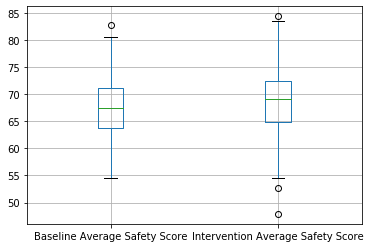

In [7]:
data.boxplot(column=['Baseline Average Safety Score','Intervention Average Safety Score'])  

In [8]:
# t-test safety_score
test_val = data['Intervention Average Safety Score'].dropna()
cont_val = data['Baseline Average Safety Score'].dropna()

print(test_val.mean(), '\t', cont_val.mean())

68.61327433628321 	 67.38720000000002


In [9]:
print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=2.380451549560585, pvalue=0.01770784503844435)


In [10]:
# t-test Forward bend
test_val = data['Intervention Average Max Forward Bend'].dropna()
cont_val = data['Baseline Average Max Forward Bend'].dropna()

print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=-7.551505470082582, pvalue=2.568493113951207e-13)


In [11]:
# t-test tilt velocity
test_val = data['Intervention Average Max Tilt Velocity'].dropna()
cont_val = data['Baseline Average Max Tilt Velocity'].dropna()

print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=-0.2074670558477131, pvalue=0.8357424510991533)


In [12]:
# t-test twist velocity
test_val = data['Intervention Average Twist Velocity'].dropna()
cont_val = data['Baseline Average Twist Velocity'].dropna()

print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=1.6792357592041458, pvalue=0.09377787193508916)


In [13]:
# t-test lift
test_val = data['Intervention Average Lift Rate'].dropna()
cont_val = data['Baseline Average Lift Rate'].dropna()

print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=-3.165477011131948, pvalue=0.001648909666524492)


In [14]:
baseline = data[['Baseline File Count','Baseline Average Lift Rate','Baseline Average Max Forward Bend','Baseline Average Max Tilt Velocity','Baseline Average Twist Velocity','Baseline Average Safety Score']]
baseline.head()

,Baseline File Count,Baseline Average Lift Rate,Baseline Average Max Forward Bend,Baseline Average Max Tilt Velocity,Baseline Average Twist Velocity,Baseline Average Safety Score
0,19.0,155.7,93.1,88.8,23.2,59.7
1,7.0,153.8,97.6,76.1,24.5,62.7
2,16.0,145.6,86.9,76.7,21.0,66.4
3,1.0,145.2,83.3,73.7,21.6,68.1
4,9.0,145.1,105.0,86.1,23.2,58.6


In [15]:
# Low Risk
baseline[baseline['Baseline Average Safety Score']>70].count()

Baseline File Count                   76
Baseline Average Lift Rate            76
Baseline Average Max Forward Bend     76
Baseline Average Max Tilt Velocity    76
Baseline Average Twist Velocity       76
Baseline Average Safety Score         76
dtype: int64

In [16]:
# Moderate Risk
moderate=baseline[(baseline['Baseline Average Safety Score']>=40) & (baseline['Baseline Average Safety Score']<70)]
moderate.count()

Baseline File Count                   173
Baseline Average Lift Rate            173
Baseline Average Max Forward Bend     173
Baseline Average Max Tilt Velocity    173
Baseline Average Twist Velocity       173
Baseline Average Safety Score         173
dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression
x = moderate.iloc[:,:-1].values
y = moderate.iloc[:,-1].values

In [18]:
reg = LinearRegression().fit(x, y)
reg.score(x,y)

0.9936761045051212

In [19]:
reg.coef_

array([-0.00224301, -0.02919763, -0.17949573, -0.32602949, -0.50179979])

In [20]:
reg.intercept_

121.80448139255772

In [21]:
# High Risk
baseline[baseline['Baseline Average Safety Score']<40].count()

Baseline File Count                   0
Baseline Average Lift Rate            0
Baseline Average Max Forward Bend     0
Baseline Average Max Tilt Velocity    0
Baseline Average Twist Velocity       0
Baseline Average Safety Score         0
dtype: int64

### Twist Velocity is the most important feature that may cause risk

In [22]:
intervention = data[['Intervention File Count','Intervention Average Lift Rate','Intervention Average Max Forward Bend','Intervention Average Max Tilt Velocity','Intervention Average Twist Velocity','Intervention Average Safety Score']]
intervention.head()

,Intervention File Count,Intervention Average Lift Rate,Intervention Average Max Forward Bend,Intervention Average Max Tilt Velocity,Intervention Average Twist Velocity,Intervention Average Safety Score
0,13.0,131.7,75.7,76.7,23.4,67.7
1,2.0,142.3,90.4,88.3,24.9,60.2
2,17.0,124.1,69.7,76.3,20.8,70.2
3,NaN,NaN,NaN,NaN,NaN,NaN
4,16.0,131.4,104.0,89.9,23.7,58.1


In [23]:
# Low Risk
intervention[intervention['Intervention Average Safety Score']>70].count()

Intervention File Count                   95
Intervention Average Lift Rate            95
Intervention Average Max Forward Bend     95
Intervention Average Max Tilt Velocity    95
Intervention Average Twist Velocity       95
Intervention Average Safety Score         95
dtype: int64

In [24]:
# Moderate Risk
intervention[(intervention['Intervention Average Safety Score'])<=70 & (intervention['Intervention Average Safety Score']>40)].count()

Intervention File Count                   0
Intervention Average Lift Rate            0
Intervention Average Max Forward Bend     0
Intervention Average Max Tilt Velocity    0
Intervention Average Twist Velocity       0
Intervention Average Safety Score         0
dtype: int64

In [25]:
# High Risk
intervention[intervention['Intervention Average Safety Score']<40].count()

Intervention File Count                   0
Intervention Average Lift Rate            0
Intervention Average Max Forward Bend     0
Intervention Average Max Tilt Velocity    0
Intervention Average Twist Velocity       0
Intervention Average Safety Score         0
dtype: int64